In [5]:
# Install required libraries
!pip install seaborn
!pip install scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA


In [6]:
# Download the dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

# Display the first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Check for missing values
df.isnull().sum()

# Data types
df.dtypes

# Summary statistics
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
# Drop rows with missing values (if needed)
df = df.dropna()




In [15]:
# List all files in the current directory
!ls



sample_data


In [22]:
!ls /content/


sample_data


In [25]:
# Download the dataset from the UCI repository directly
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

# Display the first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [10]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [12]:
df = df.dropna()

In [13]:
df = df.drop(columns=['InvoiceNo', 'Description'])

In [14]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [16]:
# List all columns in the dataset
print(df.columns)


Index(['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country'],
      dtype='object')


In [17]:
# Create the 'TotalAmount' column if it doesn't exist
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [18]:
# Scale the selected columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Quantity', 'UnitPrice', 'TotalAmount']])


In [19]:
scaled_df = pd.DataFrame(scaled_data, columns=['Quantity', 'UnitPrice', 'TotalAmount'])

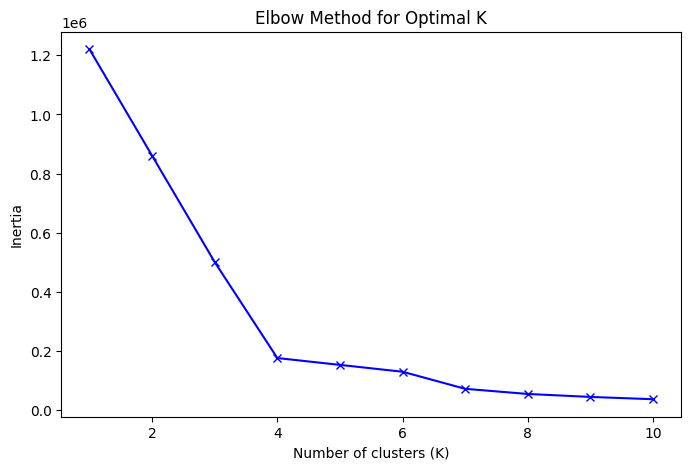

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Cluster
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0


In [20]:
# Apply Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow Method, choose the optimal K
optimal_k = 4  # Example value, update based on your plot

# Apply KMeans with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the first few rows with cluster labels
df.head()


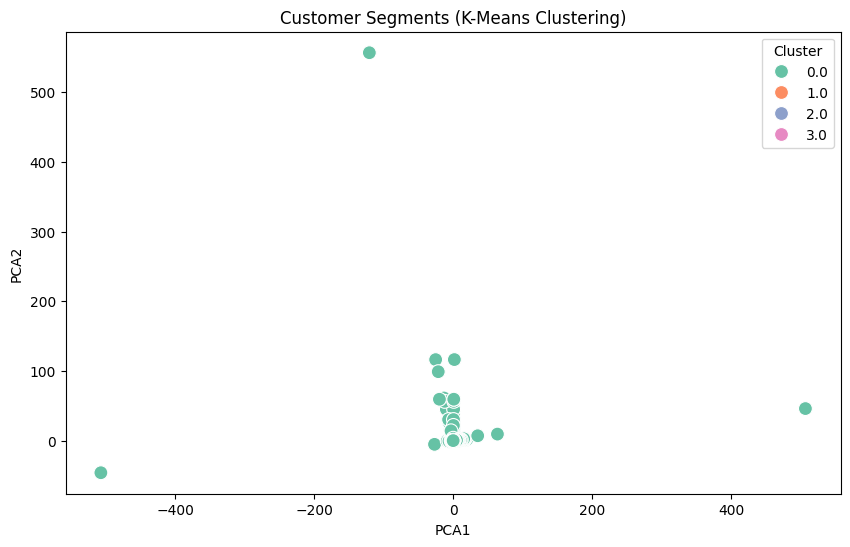

In [21]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=100)
plt.title('Customer Segments (K-Means Clustering)')
plt.show()


In [22]:
from sklearn.cluster import DBSCAN


In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize DBSCAN clusters using PCA
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=pca_df, palette='Set2', s=100)
plt.title('Customer Segments (DBSCAN Clustering)')
plt.show()


In [ ]:
# Save the dataset with clusters for visualization in Power BI or Tableau
df.to_csv('customer_segmentation_clusters.csv', index=False)
